In [1]:
!pip install tensorflow_cpu==2.18.0
!pip install matplotlib==3.9.2

print("==== All required libraries are installed =====")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
==== All required libraries are installed =====


In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [22]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
X_train.shape

(60000, 28, 28)

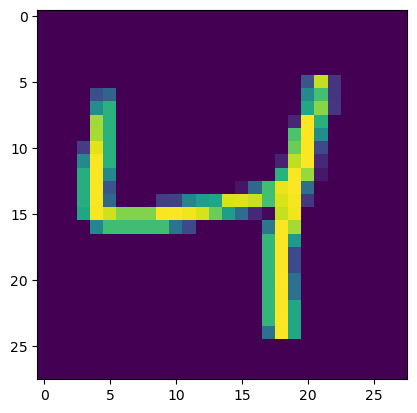

In [24]:
plt.imshow(X_train[2])

In [8]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [11]:
# define classification model
def classification_model():
    # create model
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9426 - loss: 0.1876 - val_accuracy: 0.9731 - val_loss: 0.0880
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9761 - loss: 0.0787 - val_accuracy: 0.9684 - val_loss: 0.1023
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9828 - loss: 0.0535 - val_accuracy: 0.9728 - val_loss: 0.0870
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9871 - loss: 0.0391 - val_accuracy: 0.9802 - val_loss: 0.0691
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9901 - loss: 0.0309 - val_accuracy: 0.9787 - val_loss: 0.0711
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9914 - loss: 0.0272 - val_accuracy: 0.9798 - val_loss: 0.0789
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9930 - loss: 0.0215 - val_accuracy: 0.9788 - val_loss: 0.0929
Epoch 8/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9933 - loss: 0.0202 - val_accuracy: 0.9817 - val_loss: 0.0765
Epoch 9/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.9811 - 

In [13]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))  

Accuracy: 0.9832000136375427% 
 Error: 0.016799986362457275


In [14]:
model.save('classification_model.keras')

In [15]:
pretrained_model = keras.saving.load_model('classification_model.keras')

In [17]:
def classification_model_6layers():
    # create model
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model_6layers = classification_model_6layers()

# fit the model
model_6layers.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_6layers = model_6layers.evaluate(X_test, y_test, verbose=0)
model_6layers.save('my_6layer_model.keras')

print('Accuracy_3_layers: {}% \n Accuracy_6_layers: {}'.format(scores[1], scores_6layers[1]))   

pretrained_model = keras.saving.load_model('my_6layer_model.keras')

print("Pre-trained model loaded successufully")

# Further train the loaded model
pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_20_epochs = pretrained_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy_10_epochs: {}% \n Accuracy_20_epochs: {}'.format(scores[1], scores_20_epochs[1]))   

Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9333 - loss: 0.2197 - val_accuracy: 0.9605 - val_loss: 0.1345
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9696 - loss: 0.1004 - val_accuracy: 0.9684 - val_loss: 0.1064
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9796 - loss: 0.0705 - val_accuracy: 0.9757 - val_loss: 0.0809
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9828 - loss: 0.0589 - val_accuracy: 0.9794 - val_loss: 0.0719
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9862 - loss: 0.0472 - val_accuracy: 0.9778 - val_loss: 0.0855
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9879 - loss: 0.0411 - val_accuracy: 0.9776 - val_loss: 0.0891
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9899 - loss: 0.0343 - val_accuracy: 0.9787 - val_loss: 0.1018
Epoch 8/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9906 - loss: 0.0315 - val_accuracy: 0.9814 - val_loss: 0.0752
Epoch 9/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9926 - loss: 0.0265 - val_accuracy: 0.9781 - 